# Robótica: Cinemática Direta de Manipulador

Este notebook realiza a calibração dos servos, cálculo dos ângulos das juntas e a cinemática direta de um braço robótico, além de visualizar o espaço de trabalho em 3D.

## Estrutura
- Importação de bibliotecas
- Definição dos parâmetros do robô
- Calibração dos servos
- Funções de conversão PWM ↔ ângulo
- Teste de calibração
- Cálculo das matrizes de transformação
- Visualização do workspace
- Estatísticas do workspace

In [20]:
# Importação de bibliotecas necessárias para o notebook
import math
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [21]:
## Matrizes de rotação e parâmetros do robô
o1 = 0
o2 = 0
o3 = 0
o4 = 0
L1 = 14.5/100
L2 = 18.2/100
L3 = 9.0/100
h = 7.5/100

t1 = np.array([[np.cos(o1), -np.sin(o1), 0, 0],
      [np.sin(o1),np.cos(o1), 0, 0],
      [0,0, 1, h],
      [0, 0, 0, 1]])

t2 = np.array([[np.cos(o2), -np.sin(o2), 0, 0],
      [0, 0, -1, 0],
      [np.sin(o2),np.cos(o2), 0, 0],
      [0, 0, 0, 1]])

t3 = np.array([[np.cos(o3), -np.sin(o3), 0, L1],
      [np.sin(o3),np.cos(o3), 0, 0],
      [0, 0, 1, 0],
      [0, 0, 0, 1]])
t4 = np.array([[np.cos(o4), -np.sin(o4), 0, L2],
        [np.sin(o4),np.cos(o4), 0, 0],
        [0, 0, 1, 0],
        [0, 0, 0, 1]])
t5 = np.array([[1, 0, 0, L3],
      [0, 1, 0, 0],
      [0, 0, 1, 0],
      [0, 0, 0, 1]])

In [22]:
servo_0_0 = 1530
servo_1_0 = 700
servo_2_0 = 640
servo_3_0 = 1505

servo_0_90 = 640
servo_1_90 = 1460
servo_2_270 = 1455
servo_3_270 = 725

In [23]:
# Calibração dos servos e funções de conversão PWM ↔ ângulo

# Ângulos conhecidos para calibração (em graus)
angles = np.array([0, 90, 270])

# Valores dos servos correspondentes aos ângulos conhecidos
servo_0_values = np.array([servo_0_0, servo_0_90])
servo_1_values = np.array([servo_1_0, servo_1_90])
servo_2_values = np.array([servo_2_0, servo_2_270])
servo_3_values = np.array([servo_3_0, servo_3_270])

# Cálculo dos coeficientes angulares (a) para cada servo - relação linear PWM/ângulo
a0 = (servo_0_values[1] - servo_0_values[0]) / (angles[1] - angles[0])
a1 = (servo_1_values[1] - servo_1_values[0]) / (angles[1] - angles[0])
a2 = (servo_2_values[1] - servo_2_values[0]) / (angles[2] - angles[0])
a3 = (servo_3_values[1] - servo_3_values[0]) / (angles[2] - angles[0])

# Cálculo dos coeficientes lineares (b) para cada servo
b0 = servo_0_values[0] - a0 * angles[0]
b1 = servo_1_values[0] - a1 * angles[0]
b2 = servo_2_values[0] - a2 * angles[0]
b3 = servo_3_values[0] - a3 * angles[0]

def servo_angle(servo_value, a, b):
    """
    Calcula o ângulo em graus a partir do valor PWM do servo.
    
    Args:
        servo_value (float): Valor PWM do servo
        a (float): Coeficiente angular da relação linear
        b (float): Coeficiente linear da relação linear
    
    Returns:
        float: Ângulo em graus
    """
    return (servo_value - b) / a

def calculate_angles(servo_values):
    """
    Calcula os ângulos em radianos a partir dos valores PWM dos servos.
    
    Args:
        servo_values (array): Array com 4 valores PWM [servo0, servo1, servo2, servo3]
    
    Returns:
        tuple: Tupla com 4 ângulos em radianos (theta1, theta2, theta3, theta4)
    """
    if len(servo_values) != 4:
        raise ValueError("servo_values deve conter exatamente 4 valores")
    
    # Calcular ângulos em graus
    angle_0_deg = servo_angle(servo_values[0], a0, b0)
    angle_1_deg = servo_angle(servo_values[1], a1, b1)
    angle_2_deg = servo_angle(servo_values[2], a2, b2)
    angle_3_deg = servo_angle(servo_values[3], a3, b3)
    
    # Converter para radianos
    angle_0_rad = np.radians(angle_0_deg)
    angle_1_rad = np.radians(angle_1_deg)
    angle_2_rad = np.radians(angle_2_deg)
    angle_3_rad = np.radians(angle_3_deg)
    
    return angle_0_rad, angle_1_rad, angle_2_rad, angle_3_rad

# Teste com valores de exemplo
test_angles = calculate_angles([servo_0_90, servo_1_90, servo_2_270, servo_3_270])

print("Coeficientes de calibração:")
print(f"Servo 0: a={a0:.3f}, b={b0:.3f}")
print(f"Servo 1: a={a1:.3f}, b={b1:.3f}")
print(f"Servo 2: a={a2:.3f}, b={b2:.3f}")
print(f"Servo 3: a={a3:.3f}, b={b3:.3f}")

print(f"\nÂngulos de teste (rad): {[f'{angle:.3f}' for angle in test_angles]}")
print(f"Ângulos de teste (graus): {[f'{np.degrees(angle):.1f}°' for angle in test_angles]}")



Coeficientes de calibração:
Servo 0: a=-9.889, b=1530.000
Servo 1: a=8.444, b=700.000
Servo 2: a=3.019, b=640.000
Servo 3: a=-2.889, b=1505.000

Ângulos de teste (rad): ['1.571', '1.571', '4.712', '4.712']
Ângulos de teste (graus): ['90.0°', '90.0°', '270.0°', '270.0°']


In [24]:
# Cálculo das matrizes de transformação e posições do efetuador final

# Definir os pontos de teste (valores PWM dos servos)
ponto1 = np.array([1460, 1430, 1550, 795]) # Topo do Prisma
ponto2 = np.array([1310, 1420, 1930, 1395]) # Base Ponto 1
ponto3 = np.array([1690, 1410, 1930, 1235]) # Base Ponto 2
ponto4 = np.array([1485, 1065, 1330, 795]) # Base Ponto 3

def calculate_transformation_matrix(pwm1, pwm2, pwm3, pwm4):
    """
    Calcula a matriz de transformação homogênea 4x4 do efetuador final
    a partir dos valores PWM dos servos.
    
    Args:
        pwm1, pwm2, pwm3, pwm4 (float): Valores PWM dos servos 0, 1, 2 e 3
    
    Returns:
        numpy.ndarray: Matriz de transformação homogênea 4x4
    """
    # Calcular os ângulos das juntas em radianos
    o1, o2, o3, o4 = calculate_angles([pwm1, pwm2, pwm3, pwm4])
    
    # Matriz de transformação da base para o link 1 (rotação em Z + translação em Z)
    t1 = np.array([[np.cos(o1), -np.sin(o1), 0, 0],
                   [np.sin(o1), np.cos(o1), 0, 0],
                   [0, 0, 1, h],
                   [0, 0, 0, 1]])

    # Matriz de transformação do link 1 para o link 2 (rotação em X)
    t2 = np.array([[np.cos(o2), -np.sin(o2), 0, 0],
                   [0, 0, -1, 0],
                   [np.sin(o2), np.cos(o2), 0, 0],
                   [0, 0, 0, 1]])

    # Matriz de transformação do link 2 para o link 3 (rotação em Z + translação em X)
    t3 = np.array([[np.cos(o3), -np.sin(o3), 0, L1],
                   [np.sin(o3), np.cos(o3), 0, 0],
                   [0, 0, 1, 0],
                   [0, 0, 0, 1]])

    # Matriz de transformação do link 3 para o link 4 (rotação em Z + translação em X)
    t4 = np.array([[np.cos(o4), -np.sin(o4), 0, L2],
                   [np.sin(o4), np.cos(o4), 0, 0],
                   [0, 0, 1, 0],
                   [0, 0, 0, 1]])

    # Matriz de transformação do link 4 para o efetuador final (apenas translação em X)
    t5 = np.array([[1, 0, 0, L3],
                   [0, 1, 0, 0],
                   [0, 0, 1, 0],
                   [0, 0, 0, 1]])

    # Multiplicação das matrizes de transformação para obter a transformação total
    transformation_matrix = t1 @ t2 @ t3 @ t4 @ t5

    return transformation_matrix

# Calcular as matrizes de transformação para cada ponto
print("Calculando matrizes de transformação para os 4 pontos...")
print("=" * 60)

pose1 = calculate_transformation_matrix(ponto1[0], ponto1[1], ponto1[2], ponto1[3])
angles1 = calculate_angles(ponto1)
print(f"Ponto 1 - PWM: {ponto1}")
print(f"         Ângulos (graus): [{np.degrees(angles1[0]):.1f}°, {np.degrees(angles1[1]):.1f}°, {np.degrees(angles1[2]):.1f}°, {np.degrees(angles1[3]):.1f}°]")
print(f"         Posição: X={pose1[0,3]:.4f}m, Y={pose1[1,3]:.4f}m, Z={pose1[2,3]:.4f}m")

pose2 = calculate_transformation_matrix(ponto2[0], ponto2[1], ponto2[2], ponto2[3])
angles2 = calculate_angles(ponto2)
print(f"\nPonto 2 - PWM: {ponto2}")
print(f"         Ângulos (graus): [{np.degrees(angles2[0]):.1f}°, {np.degrees(angles2[1]):.1f}°, {np.degrees(angles2[2]):.1f}°, {np.degrees(angles2[3]):.1f}°]")
print(f"         Posição: X={pose2[0,3]:.4f}m, Y={pose2[1,3]:.4f}m, Z={pose2[2,3]:.4f}m")

pose3 = calculate_transformation_matrix(ponto3[0], ponto3[1], ponto3[2], ponto3[3])
angles3 = calculate_angles(ponto3)
print(f"\nPonto 3 - PWM: {ponto3}")
print(f"         Ângulos (graus): [{np.degrees(angles3[0]):.1f}°, {np.degrees(angles3[1]):.1f}°, {np.degrees(angles3[2]):.1f}°, {np.degrees(angles3[3]):.1f}°]")
print(f"         Posição: X={pose3[0,3]:.4f}m, Y={pose3[1,3]:.4f}m, Z={pose3[2,3]:.4f}m")

pose4 = calculate_transformation_matrix(ponto4[0], ponto4[1], ponto4[2], ponto4[3])
angles4 = calculate_angles(ponto4)
print(f"\nPonto 4 - PWM: {ponto4}")
print(f"         Ângulos (graus): [{np.degrees(angles4[0]):.1f}°, {np.degrees(angles4[1]):.1f}°, {np.degrees(angles4[2]):.1f}°, {np.degrees(angles4[3]):.1f}°]")
print(f"         Posição: X={pose4[0,3]:.4f}m, Y={pose4[1,3]:.4f}m, Z={pose4[2,3]:.4f}m")


Calculando matrizes de transformação para os 4 pontos...
Ponto 1 - PWM: [1460 1430 1550  795]
         Ângulos (graus): [7.1°, 86.4°, 301.5°, 245.8°]
         Posição: X=0.1743m, Y=0.0216m, Z=0.2151m

Ponto 2 - PWM: [1310 1420 1930 1395]
         Ângulos (graus): [22.2°, 85.3°, 427.4°, 38.1°]
         Posição: X=-0.2204m, Y=-0.0901m, Z=0.2865m

Ponto 3 - PWM: [1690 1410 1930 1235]
         Ângulos (graus): [-16.2°, 84.1°, 427.4°, 93.5°]
         Posição: X=-0.1758m, Y=0.0510m, Z=0.2247m

Ponto 4 - PWM: [1485 1065 1330  795]
         Ângulos (graus): [4.6°, 43.2°, 228.6°, 245.8°]
         Posição: X=0.0281m, Y=0.0022m, Z=0.0267m


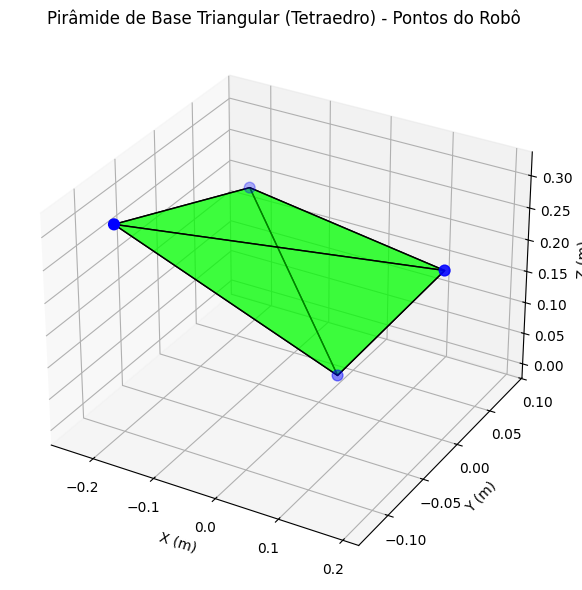

In [27]:
# Desenhar pirâmide de base triangular (tetraedro) usando pontos do robô

# Extrair os pontos da base (pose1, pose2, pose3) e topo (pose4)
vertices = np.array([
    [pose1[0,3], pose1[1,3], pose1[2,3]],
    [pose2[0,3], pose2[1,3], pose2[2,3]],
    [pose3[0,3], pose3[1,3], pose3[2,3]],
    [pose4[0,3], pose4[1,3], pose4[2,3]]
])

# Definir as faces do tetraedro (base + 3 laterais)
faces = [
    [0, 1, 2],  # base triangular
    [0, 1, 3],  # lateral 1
    [1, 2, 3],  # lateral 2
    [2, 0, 3]   # lateral 3
 ]

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Desenhar as faces
poly3d = [[vertices[idx] for idx in face] for face in faces]
ax.add_collection3d(Poly3DCollection(poly3d, facecolors='lime', linewidths=1, edgecolors='k', alpha=0.5))

# Desenhar os vértices
ax.scatter(vertices[:, 0], vertices[:, 1], vertices[:, 2], color='blue', s=60)

# Ajustar limites dos eixos
ax.set_xlim([np.min(vertices[:, 0])-0.05, np.max(vertices[:, 0])+0.05])
ax.set_ylim([np.min(vertices[:, 1])-0.05, np.max(vertices[:, 1])+0.05])
ax.set_zlim([np.min(vertices[:, 2])-0.05, np.max(vertices[:, 2])+0.05])

ax.set_xlabel('X (m)')
ax.set_ylabel('Y (m)')
ax.set_zlabel('Z (m)')
ax.set_title('Pirâmide de Base Triangular (Tetraedro) - Pontos do Robô')
plt.tight_layout()
plt.show()

In [26]:
# Tabela de validação dos pontos: PWM, ângulos (graus) e posições (X, Y, Z)
import pandas as pd

dados = []
pontos = [ponto1, ponto2, ponto3, ponto4]
poses = [pose1, pose2, pose3, pose4]
nomes = ['Ponto 1', 'Ponto 2', 'Ponto 3', 'Ponto 4']

for i in range(4):
    pwm = pontos[i]
    ang_rad = calculate_angles(pwm)
    ang_deg = [np.degrees(a) for a in ang_rad]
    pos = poses[i]
    dados.append({
        'Ponto': nomes[i],
        'PWM 0': pwm[0],
        'PWM 1': pwm[1],
        'PWM 2': pwm[2],
        'PWM 3': pwm[3],
        'Ang 0 (°)': f'{ang_deg[0]:.1f}',
        'Ang 1 (°)': f'{ang_deg[1]:.1f}',
        'Ang 2 (°)': f'{ang_deg[2]:.1f}',
        'Ang 3 (°)': f'{ang_deg[3]:.1f}',
        'X (m)': f'{pos[0,3]:.4f}',
        'Y (m)': f'{pos[1,3]:.4f}',
        'Z (m)': f'{pos[2,3]:.4f}'
    })

df = pd.DataFrame(dados)
display(df)

# Também pode salvar como CSV se desejar
# df.to_csv('validação_cinematica.csv', index=False)

,Ponto,PWM 0,PWM 1,PWM 2,PWM 3,Ang 0 (°),Ang 1 (°),Ang 2 (°),Ang 3 (°),X (m),Y (m),Z (m)
0,Ponto 1,1460,1430,1550,795,7.1,86.4,301.5,245.8,0.1743,0.0216,0.2151
1,Ponto 2,1310,1420,1930,1395,22.2,85.3,427.4,38.1,-0.2204,-0.0901,0.2865
2,Ponto 3,1690,1410,1930,1235,-16.2,84.1,427.4,93.5,-0.1758,0.0510,0.2247
3,Ponto 4,1485,1065,1330,795,4.6,43.2,228.6,245.8,0.0281,0.0022,0.0267
